In [12]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [13]:
torch.manual_seed(0)


In [14]:
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [15]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [16]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [17]:
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]  # reverse order

# split train-test set
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

508 0.56980869 0.19508377 0.54267959]
 [0.53953601 0.58390795 0.56047886 0.21707449 0.61483787]
 [0.6083567  0.6241084  0.62972384 0.16068134 0.64607843]
 [0.65343805 0.69042139 0.70115598 0.22260944 0.72295554]]->[0.72283633]
[[0.44116077 0.48157973 0.48353985 0.16077452 0.49124905]
 [0.5198131  0.5399353  0.54291034 0.1485119  0.56304895]
 [0.56189666 0.56899508 0.56980869 0.19508377 0.54267959]
 [0.53953601 0.58390795 0.56047886 0.21707449 0.61483787]
 [0.6083567  0.6241084  0.62972384 0.16068134 0.64607843]
 [0.65343805 0.69042139 0.70115598 0.22260944 0.72295554]
 [0.68365194 0.7011494  0.73347024 0.28161166 0.72283633]]->[0.76363411]
[[0.5198131  0.5399353  0.54291034 0.1485119  0.56304895]
 [0.56189666 0.56899508 0.56980869 0.19508377 0.54267959]
 [0.53953601 0.58390795 0.56047886 0.21707449 0.61483787]
 [0.6083567  0.6241084  0.62972384 0.16068134 0.64607843]
 [0.65343805 0.69042139 0.70115598 0.22260944 0.72295554]
 [0.68365194 0.7011494  0.73347024 0.28161166 0.72283633]
 [0.

In [18]:

class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x


net = Net(data_dim, hidden_dim, output_dim, 1)

In [19]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)


In [20]:
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

00.2271038293838501
10.18340936303138733
20.15106433629989624
30.12612313032150269
40.10598733276128769
50.08915018290281296
60.07493707537651062
70.06327902525663376
80.054496027529239655
90.049023859202861786
100.046934422105550766
110.04731707274913788
120.048382632434368134
130.04839476943016052
140.046337664127349854
150.042077723890542984
160.03620170056819916
170.029662009328603745
180.023386558517813683
190.018011242151260376
200.013800663873553276
210.010714655742049217
220.00853221956640482
230.0069765085354447365
240.0058244820684194565
250.004987423308193684
260.004524713847786188
270.004554683808237314
280.005089898128062487
290.005920967552810907
300.006684894673526287
310.00707267364487052
320.006973991636186838
330.0064719063229858875
340.005753521807491779
350.005014692898839712
360.004395291209220886
370.003953745122998953
380.0036766391713172197
390.003510984592139721
400.0034013083204627037
410.0033151092939078808
420.003248895052820444
430.0032176601234823465
440.0

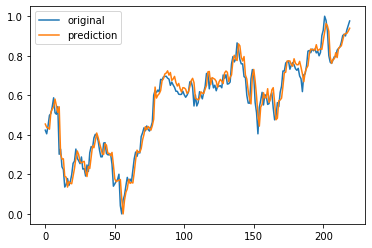

In [21]:

plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()